# Introduction au réservoir optique de Larger

In [1]:
# IMPORTS

import numpy as np
from reservoirpy.datasets import mackey_glass

from model import Larger

In [2]:
# HYPER-PARAMÈTRES

n_neurones = 50  # Nombre de points temporels

tau = 125e-6  # Retard de la boucle
epsilon = tau / (0.2 * n_neurones)  # Temps de réponse du détecteur
beta = 1.5  # Gain non-linéaire
phi = 0.5  # Bias
# paramètre équivalent au coef de réflexion du coupleur d'une cavité en anneau
rho = 0.8
# paramètre équivalent au coef de transmission du coupleur d'une cavité en anneau
kappa = 0.5

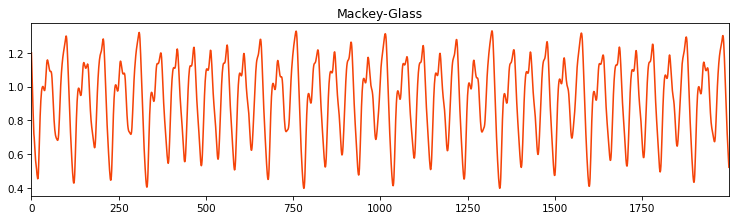

In [3]:
# DÉFINITION DE LA SÉRIE TEMPORELLE (signal)

n_tours = 2000  # Nombre de tours de boucle

timeseries = mackey_glass(n_timesteps=n_tours)

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 3))
plt.plot(timeseries)
plt.title("Mackey-Glass")
plt.show()

In [4]:
# CRÉATION DU RÉSERVOIR

reservoir = Larger(N=n_neurones, tau=tau, kappa=kappa, rho=rho, phi=phi, beta=beta, epsilon=epsilon)

In [5]:
# LANCER LE RÉSERVOIR SUR LA SÉRIE

output = reservoir.run(timeseries)

Running Larger-0: 100%|██████████| 2000/2000 [00:10<00:00, 190.82it/s]


In [6]:
output.shape

(2000, 50)

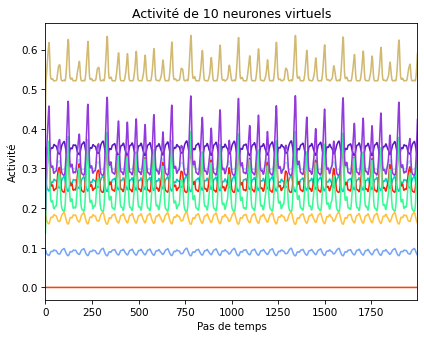

In [7]:
# AFFICHAGE DE L'ACTIVITÉ

plt.figure()
plt.plot(output[:, :10])
plt.title("Activité de 10 neurones virtuels")
plt.xlabel("Pas de temps")
plt.ylabel("Activité")
plt.show()

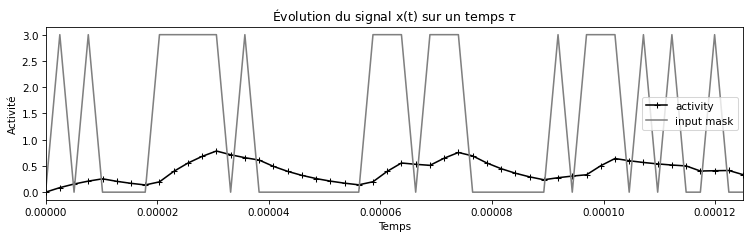

In [8]:
# AFFICHAGE DE x(t) SUR UNE PÉRIODE TAU (tous les neurones à un pas de temps)

plt.figure(figsize=(12, 3))
plt.plot(np.linspace(0, tau, n_neurones), output[0, :], '-+', color="black", label="activity")
plt.plot(np.linspace(0, tau, n_neurones), beta*(reservoir.input_mask[0]+1), color="gray", label="input mask")
plt.legend()
plt.title("Évolution du signal x(t) sur un temps $\\tau$")
plt.xlabel("Temps")
plt.ylabel("Activité")
plt.show()

### Évaluation sur une tâche de prédiction

Maintenant qu'on a observé l'activité, il est temps d'entraîner un modèle complet !
La syntaxe est la même que pour un echo state network classique.

In [ ]:
# DÉFINITION DE LA TÂCHE DE PRÉDICTION

from reservoirpy.datasets import to_forecasting

X = mackey_glass(n_timesteps=n_tours)
# Ramener tout entre 0.0 et 1.0:
X = (X - X.min()) / (X.max() - X.min())

# Prédiction à 10 pas de temps, 20% des données servent à l'évaluation
dataset = to_forecasting(X, forecast=10, test_size=0.2)
x_train, x_test, y_train, y_test = dataset

In [ ]:
# CRÉATION DU MODÈLE

# TODO

In [ ]:
# ENTRAÎNEMENT DU MODÈLE

# TODO

In [ ]:
# ÉVALUATION DES RÉSULTATS

from reservoirpy.observables import nrmse

# TODO

## Exploration des hyper-paramètres

En se basant sur les deux premières visualisations, et sur les métriques d'erreur de prédiction, explorons l'impact des différents hyper-paramètres (`n_neurones`, $\epsilon, \beta, \kappa, \rho, \tau, \phi_0$) sur le réservoir optique.

En modifiant les hyper-paramètres listés plus haut, visualisez à la fois l'activité des neurones virtuels au cours du temps, et l'état des différents neurones au cours d'un temps $t \rightarrow t+\tau$

**Rappel de la formule:**
$$\epsilon {dx(t) \over dt} + x(t) = \beta sin^2(\kappa u_{in}(t) + \rho x(t - \tau) + \phi_0)$$

In [9]:
# TODO: votre code ici

## Analyse mathématique de l'impact des hyper-paramètres

- Pourquoi certains hyper-paramètres ont un impact important et pas d'autres ?
- Est-ce qu'il y a une interdépendance entre différents hyper-paramètres ?
- Quels hyper-paramètres choisir ?
- Pourquoi une exploration d'hyper-paramètres classique ([voir le tutoriel ReservoirPy](https://github.com/reservoirpy/reservoirpy/blob/master/tutorials/4-Understand_and_optimize_hyperparameters.ipynb)) ne fonctionne pas ici ?

*vos réponses ici*

In [10]:
# TODO: votre code ici